This notebook is designed to gather pictures for a gemstone data set.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rocksgemstonesminerals/Gemstones.csv
/kaggle/input/rocknames/Rocks.csv


Clean up the gemstone directory

In [2]:
#import shutil
#shutil.rmtree('/kaggle/working/gemstones')

Setup duck duck go:

In [3]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai 'duckduckgo_search>=6.2'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 26.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.0 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

In [4]:
import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
#df = pd.read_csv('/kaggle/input/rocksgemstonesminerals/Gemstones.csv')
df = pd.read_csv('/kaggle/input/rocknames/Rocks.csv')

# Convert the DataFrame to a NumPy array
data_array = df.to_numpy()
# Print the array to verify
# print(data_array)


Helper method for downloading images

In [5]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [6]:
from pathlib import Path
from fastai.vision.all import *
path = Path('rocks')
found = 0;
for gemstones in data_array:
    name = gemstones[0]
    #name = data_array[1][0]
    
    # for name in searches:
    dest = (path/name)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{name} photos', 40))
    time.sleep(5)
    resize_images(path/name, max_size=400, dest=path/name)
    
    failed = verify_images(get_image_files(path/name))
    failed.map(Path.unlink)
    print(f'removed {len(failed)} files from {name}')
 

removed 0 files from Andesite
removed 0 files from Anorthosite
removed 1 files from Anthracite
removed 0 files from Arkose
removed 0 files from Basalt
removed 0 files from Bauxite
removed 0 files from Bentonite
removed 1 files from Bituminous Coal
removed 0 files from Breccia
removed 0 files from Calcareous Tufa
removed 0 files from Carbonatite
removed 0 files from Cataclasite
removed 0 files from Chert
removed 0 files from Chlorite Schist
removed 0 files from Conglomerate
removed 0 files from Coquina
removed 0 files from Dacite
removed 2 files from Diatomite
removed 0 files from Dolomite
removed 0 files from Dolerite
removed 0 files from Eclogite
removed 0 files from Evaporite
removed 0 files from Felsite
removed 5 files from Flint
removed 2 files from Gabbro
removed 0 files from Gneiss
removed 0 files from Granite
removed 0 files from Granophyre
removed 0 files from Greenschist
removed 0 files from Greywacke
removed 4 files from Gypsum
removed 0 files from Hematite
removed 0 files fr

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


removed 0 files from Tonolite
removed 0 files from Trondhjemite
removed 2 files from Tufa
removed 0 files from Tuff
removed 0 files from Volcaniclastic Rock
removed 0 files from Wacke
removed 0 files from Zeolite
removed 2 files from Zebra Rock


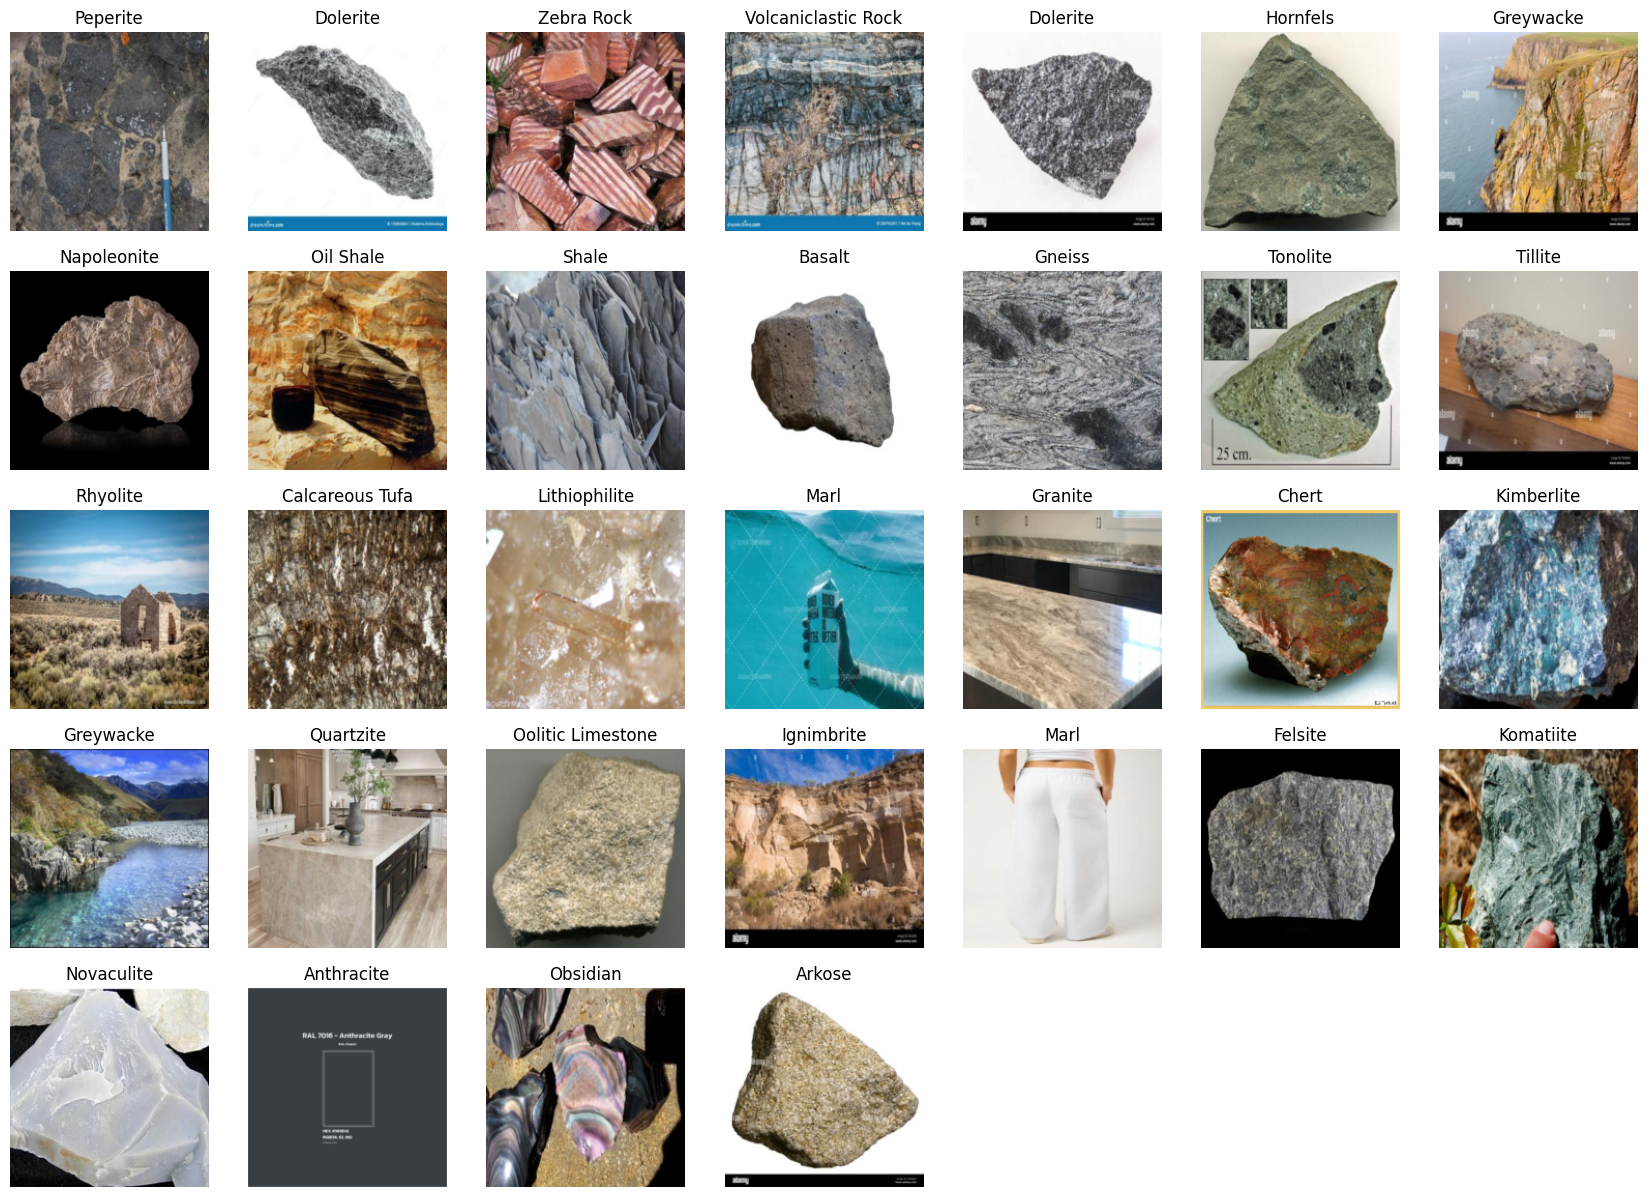

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=32)